In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-502-2025`


In [2]:
Pkg.add(["Turing","Distributions","Statistics","StatsPlots","Random","FillArrays"])

   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [3]:
using Turing, Distributions, Statistics, StatsPlots, Random, FillArrays

In [4]:
x = 0:10

0:10

In [5]:
dataerr = 3.0
d = Normal(0,dataerr)

Normal{Float64}(μ=0.0, σ=3.0)

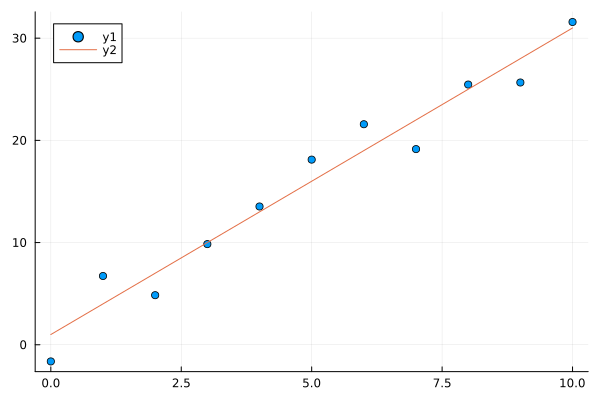

In [6]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
scatter(x,y)
plot!(x,y_true)

In [8]:
@model function lsq_line(x,y)
    b ~ Uniform(-5,5)
    m ~ Uniform(0,10)
    for i in 1:length(x)
        y[i] ~ Normal(b + m*x[i], dataerr)
    end
end

lsq_line (generic function with 2 methods)

In [12]:
my_lsq_line=lsq_line(x,y)

DynamicPPL.Model{typeof(lsq_line), (:x, :y), (), (), Tuple{UnitRange{Int64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.lsq_line, (x = 0:10, y = [-1.6336361447170487, 6.726331028484317, 4.848408409384836, 9.846460727406006, 13.527963865235357, 18.11443972836519, 21.578038051748567, 19.144502573215682, 25.461002251803823, 25.661207954302863, 31.582449253035488]), NamedTuple(), DynamicPPL.DefaultContext())

In [15]:
chain = Turing.sample(my_lsq_line,NUTS(0.65),10000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (10000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 0.61 seconds
Compute duration  = 0.61 seconds
parameters        = b, m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           b    0.8066    1.6527    0.0317   2705.7707   3267.4366    1.0000   ⋯
           m    3.0140    0.2842    0.0055   2668.7150   3460.9114    1.0004   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       

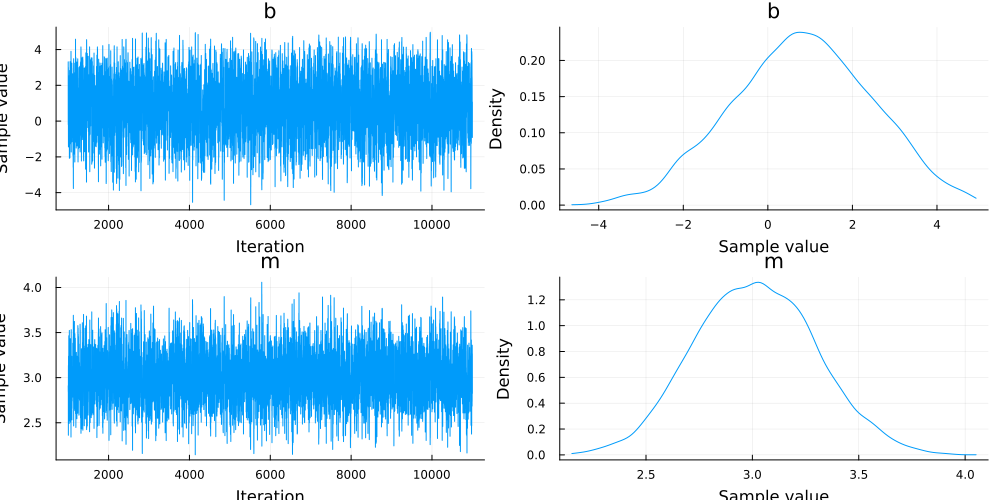

In [16]:
plot(chain)